In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

ansur_male = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv")
ansur_female = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv")

ansur_df = pd.concat([ansur_male, ansur_female], ignore_index=True)

selection = ['elbowrestheight', 'wristcircumference', 'anklecircumference', 'buttockheight', 'crotchheight']

sel_df = ansur_df[selection]

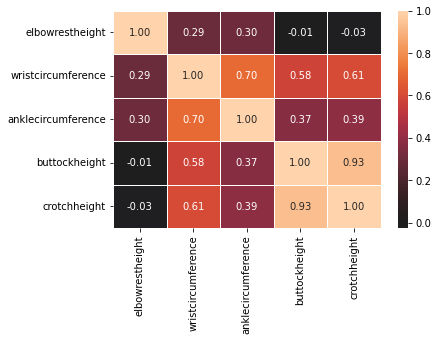

In [3]:
# Create the correlation matrix
corr = sel_df.corr()

# Draw a heatmap of the correlation matrix
sns.heatmap(corr,  center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]]


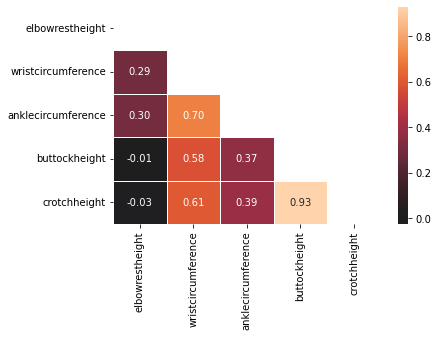

In [8]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

print(mask)

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [9]:
# removing highly correlated features

# Calculate the correlation matrix and take the absolute value
corr_df = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

The reduced_df DataFrame has 80 columns.
